<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave_dummy_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col=0)

train['lemmatized_text'] = train['lemmatized_text'].fillna('')
train['lemmatized_text'] = train['lemmatized_text'].astype(str)




test = pd.read_csv('drive/Shareddrives/Milestone 2/Testing_set.csv', sep='\t',
                     index_col=0)

test['lemmatized_text'] = test['lemmatized_text'].fillna('')
test['lemmatized_text'] = test['lemmatized_text'].astype(str)


In [20]:
sample_df = train.groupby('label').apply(lambda x: x.sample(20000, random_state=99))
sample_df.label.value_counts()

X_train_samp = sample_df[sample_df.columns[:-1]]
y_train_samp = sample_df.label.values

In [43]:
metrics_df = {"model_name":[],
              "model_instance":[],
              "train_accuracy": [],
              "train_precision": [],
              "train_recall": [],
              "train_f1": [],
              "train_aucprc":[],
              "train_aucroc": [],
              "test_accuracy":[],
              "test_precision":[],
              "test_f1": [],
              "test_recall":[],
              "test_aucprc":[],
              "test_aucroc": []
              }

In [42]:
from sklearn. metrics import precision_score, recall_score, precision_recall_curve, roc_auc_score, auc, accuracy_score,f1_score, confusion_matrix

In [4]:
def compute_metrics(model,model_name,X_train_data,y_train_data, X_test_data, y_test_data):
    # extract the model's hyperparameters and make that part of the identifier for the model 

    metrics_df['model_name'].append(model_name)
    metrics_df['model_instance'].append(model)
   
    # run train data
    y_pred_train = model.predict(X_train_data)
    acc = accuracy_score(y_train_data, y_pred_train)
    recall = recall_score(y_train_data,y_pred_train)
    precision = precision_score(y_train_data, y_pred_train)
    f1 = f1_score(y_train_data,y_pred_train)
    y_proba_train = model.predict_proba(X_train_data)[:,1]
    prc,rec,thres = precision_recall_curve(y_train_data, y_proba_train)
    auc_prc = auc(rec,prc)
    roc = roc_auc_score(y_train_data, y_proba_train)
   
   
    metrics_df['train_accuracy'].append(acc)
    metrics_df['train_recall'].append(recall)
    metrics_df['train_precision'].append(precision)
    metrics_df['train_f1'].append(f1)
    metrics_df['train_aucprc'].append(auc_prc)
    metrics_df['train_aucroc'].append(roc)


    #run test data
    y_pred = model.predict(X_test_data)
    acc = accuracy_score(y_test_data, y_pred)
    recall = recall_score(y_test_data,y_pred)
    precision = precision_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data,y_pred)
    y_proba = model.predict_proba(X_test_data)[:,1]
    prc,rec,thres = precision_recall_curve(y_test_data, y_proba)
    auc_prc = auc(rec,prc)
    roc = roc_auc_score(y_test_data, y_proba)

    metrics_df['test_accuracy'].append(acc)
    metrics_df['test_recall'].append(recall)
    metrics_df['test_precision'].append(precision)
    metrics_df['test_f1'].append(f1)
    metrics_df['test_aucprc'].append(auc_prc)
    metrics_df['test_aucroc'].append(roc)


    cm = confusion_matrix(y_test_data, y_pred)
    return cm

In [62]:
# Note that the final model is based on the Mads + tfidf model.

### **Dummy Classifier with Tfidf Vectorizer**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DummyClassifier())
                    ])

parameters = {
    'tfidf__min_df': [25,30],
    'tfidf__stop_words': ['english'],
    'tfidf__ngram_range': [(1, 2)],
    'clf__strategy': ['most_frequent', 'prior', 'stratified', 'uniform']
}

In [ ]:
# X_train_vec = tf_vec.fit_transform(X_train['lemmatized_text'])

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_dc_f1 = GridSearchCV(pipeline,
                           param_grid=parameters,
                           scoring='f1',
                           n_jobs=-1,
                           cv=3)
grid_dc_f1.fit(X_train['lemmatized_text'],y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'clf__strategy': ['most_frequent', 'prior',
                                           'stratified', 'uniform'],
                         'tfidf__min_df': [25, 30],
                         'tfidf__ngram_range': [(1, 2)],
                         'tfidf__stop_words': ['english']},
             scoring='f1')

In [ ]:
grid_dc_f1.best_params_

{'clf__strategy': 'most_frequent',
 'tfidf__min_df': 25,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': 'english'}

In [ ]:
model_name = 'Tf-idf DC most_freq min_df 25'

compute_metrics(grid_dc_f1.best_estimator_,model_name,
                X_train['lemmatized_text'],
                y_train,X_test['lemmatized_text'], y_test)



In [ ]:
metrics_df

{'model_name': ['Tf-idf DC most_freq min_df 25'],
 'model_instance': [Pipeline(steps=[('tfidf',
                   TfidfVectorizer(min_df=25, ngram_range=(1, 2),
                                   stop_words='english')),
                  ('clf', DummyClassifier(strategy='most_frequent'))])],
 'train_accuracy': [0.5189033099771687],
 'train_precision': [0.5189033099771687],
 'train_recall': [1.0],
 'train_aucprc': [0.7594516549885844],
 'train_aucroc': [0.5],
 'test_accuracy': [0.518915909608523],
 'test_precision': [0.518915909608523],
 'test_recall': [1.0],
 'test_aucprc': [0.7594579548042615],
 'test_aucroc': [0.5]}

# Mads Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [51]:
cols = ['d_chall_score','aoa_mean','aoa_min','aoa_max','conc_rating_mean','conc_rating_min', 'conc_rating_max','num_lemmas']
X_features = ['lemmatized_text'] + cols

In [ ]:
mads_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler()),
                          ('clf', DummyClassifier())
                         ])

parameters = {
    'clf__strategy': ['most_frequent', 'prior', 'stratified', 'uniform']
}

In [ ]:
grid_dc_mads_f1 = (GridSearchCV(mads_pipeline,
                                  param_grid=parameters,
                                  scoring='f1',
                                  n_jobs=-1, 
                                  cv=3).fit(X_train_mads_features,y_train))

In [ ]:
grid_dc_mads_f1.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', DummyClassifier(strategy='most_frequent'))])

In [ ]:
model_name = 'MADS DC most_freq stdsclr'
compute_metrics(grid_dc_mads_f1.best_estimator_,
                model_name,
                X_train_mads_features,
                y_train,
                X_test_mads_features,
                y_test)


# tfidf + Mads Features

In [27]:
import scipy
from scipy.sparse import hstack
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer

In [28]:
vectorizer = Pipeline([
              ('tfidf', TfidfVectorizer(min_df=25,
                                        stop_words='english',
                                        ngram_range=(1, 2)))
              ])

mads_pipe = Pipeline([
              ('impute_mean',SimpleImputer(strategy='mean')),
              ('scaler',StandardScaler()),
              ('bin',KBinsDiscretizer(n_bins=4))
              ])

preprocessor = ColumnTransformer(transformers=[
    ('mads',mads_pipe,cols),
    ('text', vectorizer, 'lemmatized_text')
    ])


              
pipeline = Pipeline([('preprocessor', preprocessor),
                     ('clf', DummyClassifier())  # classifier
                     ])

In [29]:
parameters = {
    'clf__strategy': ['most_frequent', 'prior', 'stratified', 'uniform']
}


grid_dc_all_f1= GridSearchCV(pipeline,
                              param_grid=parameters,
                              scoring='f1',
                              n_jobs=-1,
                              return_train_score=True,
                              cv=StratifiedKFold(n_splits=10)).fit(X_train_samp,y_train_samp)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


In [30]:
grid_dc_all_f1.best_params_

{'clf__strategy': 'stratified'}

In [31]:
pd.DataFrame(grid_dc_all_f1.cv_results_).T

,0,1,2,3
mean_fit_time,2.236877,2.215674,2.239489,2.224051
std_fit_time,0.040834,0.027306,0.030565,0.041389
mean_score_time,0.171672,0.170716,0.174466,0.180585
std_score_time,0.011635,0.013748,0.007816,0.009891
param_clf__strategy,most_frequent,prior,stratified,uniform
params,{'clf__strategy': 'most_frequent'},{'clf__strategy': 'prior'},{'clf__strategy': 'stratified'},{'clf__strategy': 'uniform'}
split0_test_score,0.0,0.0,0.501366,0.493598
split1_test_score,0.0,0.0,0.504682,0.507589
split2_test_score,0.0,0.0,0.488216,0.50573
split3_test_score,0.0,0.0,0.521245,0.49737


In [52]:
X_train, X_val, y_train, y_val = train_test_split(train[X_features], 
                                                  train['label'],
                                                  stratify=train['label'], 
                                                  random_state=99)

In [53]:
tfidf_prefix = 'preprocessor__text__tfidf__'
clf_prefix = 'clf__'


tfidf_best_params = {k[len(tfidf_prefix):]:v 
                     for (k, v) in grid_dc_all_f1.best_params_.items() 
                     if tfidf_prefix in k}

clf_best_params = {k[len(clf_prefix):]:v 
                   for (k, v) in grid_dc_all_f1.best_params_.items() 
                   if clf_prefix in k}

num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('binner', KBinsDiscretizer(n_bins=4)),
])

text_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(**tfidf_best_params)),
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, cols),
    ('text', text_pipe, 'lemmatized_text'),
])

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DummyClassifier(**clf_best_params)),
])

In [54]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('binner',
                                                                   KBinsDiscretizer(n_bins=4))]),
                                                  ['d_chall_score', 'aoa_mean',
                                                   'aoa_min', 'aoa_max',
                                                   'conc_rating_mean',
                                                   'conc_rating_min',
                                                   'conc_rating_max',
                                                   'num_lemmas']),
                                                 ('text',
                                                  Pipeline(steps=[('tfidf',
        

In [55]:
# compute metrics from the test split data

model_name = "DummyClassifier"
for k,v in grid_dc_all_f1.best_params_.items():
  model_name +=f'{k}_{v}'

cm = compute_metrics(clf,model_name,X_train, y_train, X_val, y_val)

TypeError: ignored

In [45]:
metrics_df = pd.DataFrame(metrics_df)

In [46]:
metrics_df.T

,0
model_name,DummyClassifierclf__strategy_stratified
model_instance,"(ColumnTransformer(transformers=[('num',\n ..."
train_accuracy,0.500002
train_precision,0.5
train_recall,0.500089
train_f1,0.500044
train_aucprc,0.625273
train_aucroc,0.500496
test_accuracy,0.500411
test_precision,0.500417


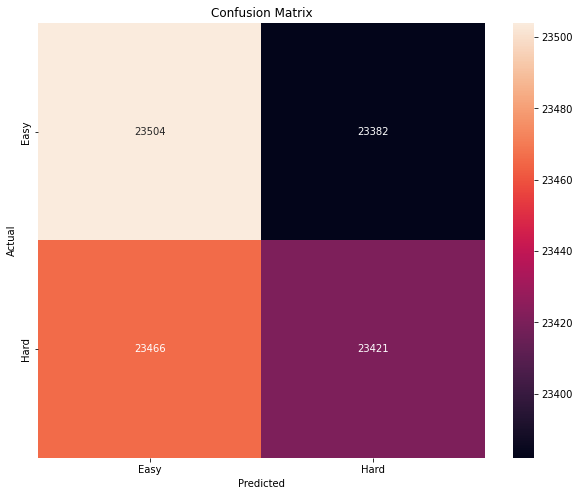

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Easy','Hard'],
            yticklabels=['Easy','Hard'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();


In [58]:
# Final Test on held out data set

X_test = test[X_features]
y_test = test.label

# cm = compute_metrics(clf,model_name,X_train, y_train, X_test, y_test)
print("Training Dataset")
print('Train Accuracy',round(metrics_df.iloc[0]['train_accuracy'],3))
print('Train Recall', round(metrics_df.iloc[0]['train_recall'],3))
print('Train Precision', round(metrics_df.iloc[0]['train_precision'],3))
print('Train F1', round(metrics_df.iloc[0]['train_f1'],3))
print('Train AUC PRC', round(metrics_df.iloc[0]['train_aucprc'],3))
print('Train AUC ROC', round(metrics_df.iloc[0]['train_aucroc'],3))
print(" ")
print("Testing Dataset")
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
y_proba = clf.predict_proba(X_test)[:,1]
prc,rec,thres = precision_recall_curve(y_test, y_proba)
auc_prc = auc(rec,prc)
roc = roc_auc_score(y_test, y_proba)

print('Test Accuracy:', round(acc,3))
print('Test Recall', round(recall,3))
print('Test Precision', round(precision,3))
print('Test F1-score', round(f1,3))
print('AUC PRC', round(auc_prc,3))
print('Test AUC ROC', round(roc,3))

Training Dataset
Train Accuracy 0.5
Train Recall 0.5
Train Precision 0.5
Train F1 0.5
Train AUC PRC 0.625
Train AUC ROC 0.5
 
Testing Dataset
Test Accuracy: 0.505
Test Recall 0.508
Test Precision 0.505
Test F1-score 0.506
AUC PRC 0.625
Test AUC ROC 0.501


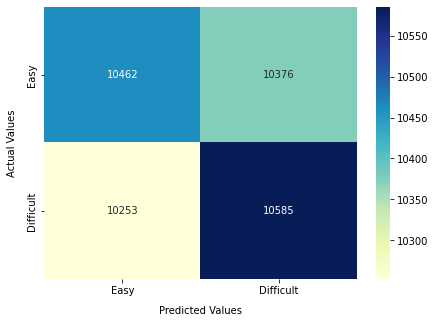

In [60]:
def plot_cf_matrix(y_true, y_pred):
  cf_matrix = confusion_matrix(y_true, y_pred).round(0)
  tick_lables = ('Easy', 'Difficult')

  fig = plt.figure(figsize=(7, 5))
  ax = plt.gca()
  ax = sns.heatmap(cf_matrix, 
              annot=True,
              fmt='.0f',
              xticklabels=tick_lables,
              yticklabels=tick_lables,
              cmap=plt.cm.get_cmap('YlGnBu'),
              ax=ax,)
  
  ax.set_xlabel('Predicted Values', labelpad=10.0)
  ax.set_ylabel('Actual Values', labelpad=10.0)



plot_cf_matrix(y_test,y_pred)

In [61]:
import joblib
model_path = ''.join(['drive/Shareddrives/Milestone 2/dummyclassifier-clf.joblib'])
joblib.dump(clf['clf'], model_path)

['drive/Shareddrives/Milestone 2/dummyclassifier-clf.joblib']

# Sentence Embeddings

In [ ]:
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
embeddings = loadtxt('drive/Shareddrives/Milestone 2/embeddings.csv', delimiter=',')
embeddings

array([[-0.10521097,  0.04652381,  0.09932816, ..., -0.53146267,
         0.24081262,  0.04764764],
       [-0.09595645,  0.28408318,  0.0416585 , ..., -0.6049515 ,
         0.23389882,  0.2116979 ],
       [ 0.00624134,  0.04496894,  0.28006756, ..., -0.21483139,
         0.40460399, -0.12047322],
       ...,
       [-0.05062665,  0.11346165,  0.37695   , ..., -0.35318942,
         0.46983531, -0.04529605],
       [-0.13691955,  0.46627818, -0.0528408 , ..., -0.55561154,
         0.56975963,  0.25214309],
       [-0.23494626,  0.30814424,  0.28275521, ..., -0.56363898,
         0.44196188,  0.01724233]])

In [ ]:
embeddings.shape

(395169, 100)

In [ ]:
# Combine the embeddings and the original_text + Mads features
emb = pd.DataFrame(embeddings)
new_df = pd.concat([df,emb], axis=1)
new_df.head()

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,...,90,91,92,93,94,95,96,97,98,99
0,There is manuscript evidence that Austen conti...,There be manuscript evidence that Austen conti...,8.533221,5.809310,3.57,12.12,2.495517,1.33,4.57,38.0,...,-0.000574,-0.282132,0.048765,0.281763,-0.562752,-0.018829,-0.266238,-0.531463,0.240813,0.047648
1,"In a remarkable comparative analysis , Mandaea...","In a remarkable comparative analysis , Mandaea...",12.320171,7.402308,2.89,11.94,2.334286,1.46,4.93,21.0,...,0.142222,-0.103547,-0.090528,0.095581,-0.276107,0.028346,-0.250517,-0.604951,0.233899,0.211698
2,"Before Persephone was released to Hermes , who...","Before Persephone be release to Hermes , who h...",5.931500,5.231351,2.78,11.17,2.556486,1.43,4.86,40.0,...,-0.042911,-0.127006,-0.027232,0.002538,-0.531988,-0.153132,-0.162387,-0.214831,0.404604,-0.120473
3,Cogeneration plants are commonly found in dist...,Cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.369655,1.52,4.93,32.0,...,0.113040,-0.480430,-0.121593,0.049611,-0.675361,0.358477,-0.145952,-0.454261,0.618850,0.002099
4,Geneva is the second-most-populous city in Swi...,Geneva be the second-most-populous city in Swi...,7.550745,5.455000,3.69,12.62,2.399333,1.43,4.79,22.0,...,-0.003146,-0.214928,-0.110112,0.408002,-0.512044,0.292142,-0.294712,-0.306517,0.631877,-0.067776


In [ ]:
X_train_indexes = X_train.index
X_train_emb = new_df.iloc[X_train_indexes, 11:]

# Extract just the embedding data from test set
X_test_indexes = X_test.index
X_test_emb = new_df.iloc[X_test_indexes, 11:]

X_train_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
91224,-0.372383,0.221127,0.418656,-0.075037,0.278601,0.282382,-0.179060,0.063454,-0.416448,0.017981,...,-0.318357,0.059500,-0.174866,0.281088,-0.411315,-0.156737,-0.283365,-0.481805,0.567332,0.058942
117728,0.016294,-0.113769,0.293257,-0.168054,0.222634,0.146599,0.070255,0.014296,-0.186127,0.057335,...,-0.083942,-0.180034,-0.202958,0.465693,-0.490053,0.123509,-0.455105,-0.099749,0.473420,-0.061285
316017,-0.073500,0.113797,0.029153,-0.429477,0.063771,0.347380,-0.124431,0.282229,-0.075735,0.068369,...,0.054707,-0.032472,-0.121287,0.100465,-0.510452,0.222725,-0.246233,-0.182647,0.495054,0.045244
7423,0.029224,-0.239776,0.132184,0.049248,0.145883,0.229183,-0.007984,0.014910,-0.091277,-0.008269,...,0.064875,-0.315753,-0.039297,0.541282,-0.457863,0.255201,-0.281852,-0.214106,0.434917,-0.177841
201052,-0.046389,-0.126177,0.413811,-0.052786,0.227497,0.208976,0.116180,0.549721,0.018257,0.237596,...,0.318063,-0.234182,-0.218740,0.573339,-0.420712,0.340783,-0.341281,-0.248862,0.539164,-0.111740


In [ ]:
embed_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('clf',DummyClassifier())
                         ])



grid_dc_emb_f1 = (GridSearchCV(embed_pipeline,
                                 param_grid=parameters,
                                 scoring='f1',
                                 n_jobs=-1, 
                                 cv=3).fit(X_train_emb,y_train))

In [ ]:
grid_dc_emb_f1.best_params_

{'clf__strategy': 'most_frequent'}

In [ ]:
model_name = 'embedding DC most_freq'
# X_test_emb_mm = scaler.transform(X_test_emb)
compute_metrics(grid_dc_emb_f1.best_estimator_,
                model_name,
                X_train_emb,
                y_train,
                X_test_emb,
                y_test)

In [ ]:
dc_emb = DummyClassifier(strategy='most_frequent').fit(X_train_emb_std, y_train)
print(dc_emb.score(X_train_emb_std, y_train))

0.5189033099771687


In [ ]:
grid_dc_emb_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_emb_acc.fit(X_train_emb_std,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

**Sentence Embeddings + Mads Features**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
X_train_emb_mads = new_df.iloc[X_train.index].copy()
X_test_emb_mads = new_df.iloc[X_test.index].copy()

X_train_emb_mads.drop(['original_text','lemmatized_text','label'],inplace=True,axis=1)
X_test_emb_mads.drop(['original_text','lemmatized_text','label'],inplace=True,axis=1)

In [ ]:
mads_pipe = Pipeline([
              ('impute_mean',SimpleImputer(strategy='mean')),
              ])

preprocessor = ColumnTransformer(transformers=[
    ('mads',mads_pipe,cols)
    ])


              
pipeline = Pipeline([('preprocessor', preprocessor),
                     ('scaler',StandardScaler()),
                     ('clf', DummyClassifier())  # classifier
                     ])

In [ ]:
grid_dc_embmads_f1 = GridSearchCV(pipeline,
                                    param_grid=parameters,
                                    scoring='f1',
                                    n_jobs=-1,
                                    cv=3)
grid_dc_embmads_f1.fit(X_train_emb_mads,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('mads',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer())]),
                                                                         ['d_chall_score',
                                                                          'aoa_mean',
                                                                          'aoa_min',
                                                                          'aoa_max',
                                                                          'conc_rating_mean',
                                                                          'conc_rating_min',
                                                                          'conc_rating_max',
  

In [ ]:
grid_dc_embmads_f1.best_params_

{'clf__strategy': 'most_frequent'}

In [ ]:
model_name += 'emb + Mads dc most_freq'
compute_metrics(grid_dc_embmads_f1.best_estimator_,
                model_name,
                X_train_emb_mads,y_train, X_test_emb_mads, y_test)

In [ ]:
grid_dc_embmads_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_embmads_acc.fit(X_train_emb_mads,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [ ]:
grid_dc_embmads_acc.best_params_

{'strategy': 'most_frequent'}

In [ ]:
X_test_emb_mads = np.hstack((X_test_emb_std,
                     X_test_mads_features_std))

model_name = 'embedding + Mads most_freq'
compute_metrics(grid_dc_embmads_acc.best_estimator_,
                model_name,
                X_test_emb_mads,
                y_test)

In [ ]:
metrics = pd.DataFrame(metrics_df)

In [ ]:
metrics

,model_name,model_instance,train_accuracy,train_precision,train_recall,train_aucprc,train_aucroc,test_accuracy,test_precision,test_recall,test_aucprc,test_aucroc
0,Tf-idf DC most_freq min_df 25,"(TfidfVectorizer(min_df=25, ngram_range=(1, 2)...",0.518903,0.518903,1.0,0.759452,0.5,0.518916,0.518916,1.0,0.759458,0.5
1,MADS DC most_freq stdsclr,"(SimpleImputer(), StandardScaler(), DummyClass...",0.518903,0.518903,1.0,0.759452,0.5,0.518916,0.518916,1.0,0.759458,0.5
2,Tf-idf + Mads DC most freq,"(ColumnTransformer(transformers=[('mads',\n ...",0.518903,0.518903,1.0,0.759452,0.5,0.518916,0.518916,1.0,0.759458,0.5
3,embedding DC most_freq,"(StandardScaler(), DummyClassifier(strategy='m...",0.518903,0.518903,1.0,0.759452,0.5,0.518916,0.518916,1.0,0.759458,0.5
4,embedding DC most_freqemb + Mads dc most_freq,"(ColumnTransformer(transformers=[('mads',\n ...",0.518903,0.518903,1.0,0.759452,0.5,0.518916,0.518916,1.0,0.759458,0.5


In [ ]:
import pickle

In [ ]:
best_model = metrics.iloc[0]['model_instance']

In [ ]:
f = open('drive/Shareddrives/Milestone 2/dummy_clf_model.pkl','wb')
pickle.dump(best_model,f)